In [70]:
import pandas as pd

# 1 Dataset overview

In [71]:
# read csv file
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
# data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [73]:
# shape of dataframe
df.shape

(8807, 12)

# 2 Identifying Missing data

In [74]:
# number of rows missing in each column
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [75]:
# % of rows missing in each column
for column in df.columns:
    p=df[column].isnull().mean()
    print(column+ ': '+ str(round(p*100,2)))

show_id: 0.0
type: 0.0
title: 0.0
director: 29.91
cast: 9.37
country: 9.44
date_added: 0.11
release_year: 0.0
rating: 0.05
duration: 0.03
listed_in: 0.0
description: 0.0


# 3 Dealing with missing values

In [82]:
# remove a column or row with .drop , .dropna or .isnull

# 1]drop column
#df.drop('director',axis=1)

# 2]drop row
#no_director=df[df['director'].isnull()].index
#df.drop(no_director,axis=0,inplace=True).isnull().sum()

# 3] ~ + .isnull()
df[~(df['director'].isnull())].isnull().sum()

# 4] dropna()
#df.dropna(subset=['director'])

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [84]:
# use fillna() to replace NAN by the mean , median(numeric data) or mode

# Show rows where rating is missing (optional)
df[df['rating'].isnull()]

# Calculate the mode value
mode = ''.join(df['rating'].mode())

# Safely fill NaN values
df['rating'] = df['rating'].fillna(mode)


In [87]:
# Replace NaN in 'duration' with 0
df['duration'] = df['duration'].fillna(0)

# Backward fill all remaining NaN values
df = df.bfill()

# OR forward fill (if you prefer that direction)
# df = df.ffill()


In [91]:
# Extracting data from "duration" column with split and extract() method

df_movie=df[df['type']=='Movie']

df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11460\2857752415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)


In [99]:
#df_movie['date_added'].str.split(',',expand=True)[1]
df_movie['date_added'].str.extract('(\d{4})')


,0
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


# 4 Identifying Outliers

## 4.1 Using histograms to identify outliers within numeric data

<Axes: ylabel='Frequency'>

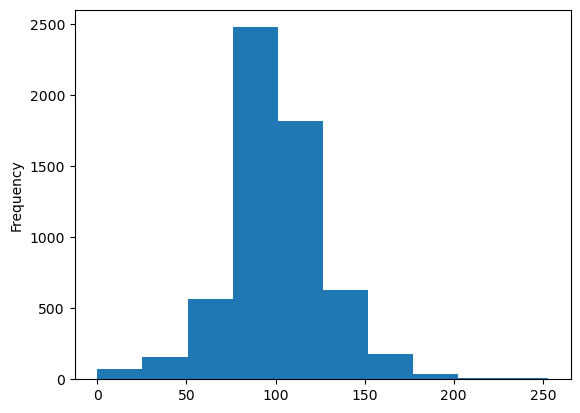

In [101]:
# make histogram with pandas 
df_movie['minute'].plot(kind='hist',bins=10)

In [102]:
# get bar ranges with value_counts method and numbers of bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.254, 25.3]      72
(25.3, 50.6]       157
(50.6, 75.9]       567
(75.9, 101.2]     2475
(101.2, 126.5]    1813
(126.5, 151.8]     631
(151.8, 177.1]     178
(177.1, 202.4]      34
(202.4, 227.7]      10
(227.7, 253.0]       6
Name: count, dtype: int64

In [108]:
# dealing with outliers
df_movie[(df_movie['minute']>25) & (df_movie['minute']<202)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## 4.2 Using Boxplot to identify outliers within numeric data

<Axes: >

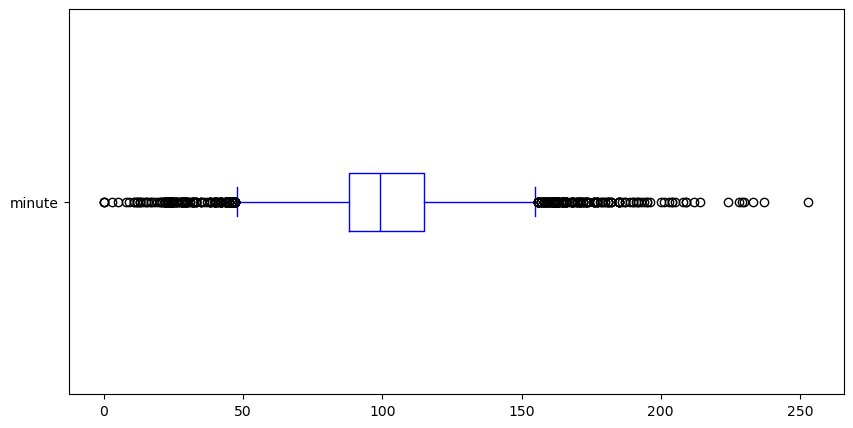

In [109]:
# make a boxplot with pandas
df_movie['minute'].plot(kind='box',vert=False,color='blue',figsize=(10,5))

In [114]:
# overview descriptive statitics
# IQR = Q3-Q1
IQR=115-88

# Q1 - 1.5*IQR
min_boxplot=88-1.5*(IQR)

# Q3 + 1.5*IQR
max_boxplot=115+1.5*(IQR)

print(max_boxplot)
print(min_boxplot)

#df_movie['minute'].describe()

155.5
47.5


In [115]:
# DEALING WITH OUTLIERS
df_movie[(df_movie['minute']>47) & (df_movie['minute']<155)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## 4.3 Using bars to identify outliers within categorical data

<Axes: xlabel='rating'>

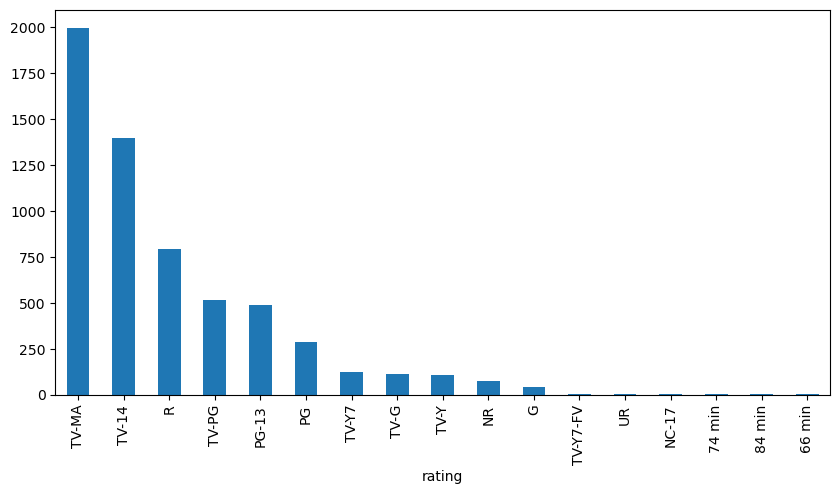

In [120]:
# making barplot with pandas
df_movie['rating'].value_counts().plot(kind='bar',figsize=(10,5))

# 5 text Normalization

## 5.1 Dealing with inconsistent capitalization : lower(), upper(), title()

In [128]:
# change the case of text with the str attribute 
#df_movie['title'].str.lower()
df_movie['title'].str.upper()
df_movie['title'].str.title()

# update values
#df_movie['title']=df_movie['title'].str.upper()
df_movie
# change the case of text with the apply method
df_movie['title']=df_movie['title'].apply(lambda x:x.title())
df_movie


C:\Users\Admin\AppData\Local\Temp\ipykernel_11460\1384438091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title']=df_movie['title'].apply(lambda x:x.title())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## 5.2 Remove blank spaces with strip() , lstrip(), and rstrip()

In [134]:
# how the strip() method works
movie_title = '  Titantic  '

# trim leading space with lstrip()
movie_title.lstrip()

# trim trailing space with rstrip()
movie_title.rstrip()

# trim leading and trailing space with strip()
movie_title.strip()


'Titantic'

In [139]:
# get rid of leading and trailing white spaces with strip() method
#df_movie['title']=df_movie['title'].str.strip()
df_movie
# get rid of leading and trailing white spaces with the apply method
df_movie['title']=df_movie['title'].apply(lambda x:x.strip())
df_movie


C:\Users\Admin\AppData\Local\Temp\ipykernel_11460\3921667237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title']=df_movie['title'].apply(lambda x:x.strip())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## 5.3 Replace strings with replace() or sub()

In [144]:
# remove punctuation signs with the str.replace() method and regex
#df_movie['title'].str.replace('[^\w\s]','',regex=True)

# remove punctuation signs with the replace() method and regex
#df_movie['title'].replace('[^\w\s]','',regex=True)


# differnce between str.replace() and replace()
#df_movie['title'].replace(1,2,regex=False)
#df_movie['title'].str.replace(1,2,regex=False)


# remove punctuation signs with the re.sub() function via the apply method
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 5943, dtype: object